In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

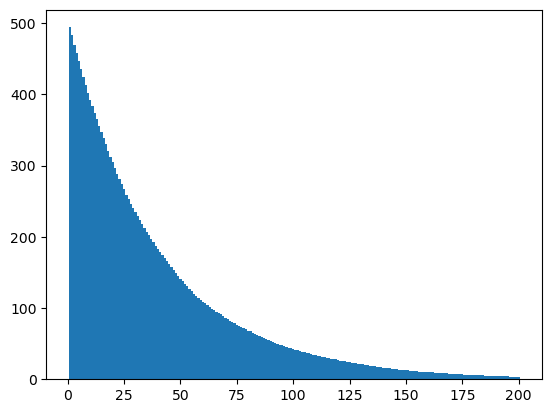

In [2]:
#Absorber case, Multiple particles

#Parameters
x_beg = 0
x_end = 0
L = 10
sigma_a = 0.25
sigma_t = 0.25  # Total macroscopic cross-section (cm^-1), should be the same as sigma_a or sigma_s
#mu = 1
N_bins = 200

#Determine the length of each bin and set up counters for each bin to tally the particles. Also set up leakage counters
bin_length = L/ N_bins
bins_tally = np.linspace(0,0,200)
left_leakage_tally = 0
right_leakage_tally = 0

#Set up number of particles and their associated random number to determine distances
num_samples = 10000  # Number of distances to sample
ran_samples = np.random.rand(num_samples)

for i in range (num_samples):
    x_beg = 0
    x_end = 0
    
    #Sapling distances
    d = -1 / sigma_t * np.log(ran_samples[i])

    #For an isotropic source, the cosine of the angle of incidence must be determined
    squig = np.random.rand(1)
    mu = np.sqrt(squig[0])
    

    #Add distance before any interaction occurs to inital position, accounting for angle
    x_end = x_beg + (mu * d)

    #Check if particle left the slab
    if x_end >= L:
        x_end = L
    elif x_end < 0:
        x_end = 0

    #Determine the bin that the particle has its first interaction in, and total track length in final bin.
    bin_num = x_end / bin_length
    bin_before = math.floor(bin_num)
    bin_current_length = (bin_num - bin_before) * bin_length

    #Add tallies to respective bins based on path length traveled in each bin
    for i in range(bin_before):
        bins_tally[i] = bins_tally[i] + bin_length
    
    #Add partial tally to bin where particle has its first interaction
    if x_end != L: 
        bins_tally[bin_before] = bins_tally[bin_before] + bin_current_length
    
    #Count Leakages
    if x_end ==0:
        left_leakage_tally = left_leakage_tally + 1
    if x_end ==L:
        right_leakage_tally = right_leakage_tally +1
    
    #Check absorbtion at the end of particle path length (should be 100% absorbtion rate, as it is the only interaction type)
    if x_end > 0 and x_end < L:
        rand = np.random.rand(1)
        if rand <= (sigma_a/sigma_t):
            continue

#Create figure showing scalar flux distributions across the bins
x = np.linspace(1,200, 200)
plt.bar(x, bins_tally, width=1.0)
plt.show()

In [ ]:
#Scatter Case
#Parameters
L = 10
sigma_s = 2
sigma_t = 2  # Total macroscopic cross-section (cm^-1), should be the same as sigma_a or sigma_s
mu = 1
N_bins = 200

#Determine the length of each bin and set up counters for each bin to tally the particles. Also set up leakage counters
bin_length = L/ N_bins
bins_tally = np.linspace(0,0,200)
bins_left_x_value = np.linspace(0,9.95,200)
left_leakage_tally = 0
right_leakage_tally = 0

#Set up number of particles and their associated random number to determine distances
num_samples = 100  # Number of distances to sample
ran_samples = np.random.rand(num_samples)


for i in range (num_samples):

    #Initial Distance
    x_beg = 0
    x_end = 0
    d = -1 / sigma_t * np.log(ran_samples[i])
    x_end = x_beg + (mu * d)

    #Check if particle left the slab
    if x_end >= L:
        x_end = L
    elif x_end < 0:
        x_end = 0

    #Count Leakages in the case that the particle left the slab
    if x_end ==0:
        left_leakage_tally = left_leakage_tally + 1
    if x_end ==L:
        right_leakage_tally = right_leakage_tally +1
        bin_num = x_end / bin_length
        bin_before = math.floor(bin_num)
        bin_current_length = (bin_num - bin_before) * bin_length
        #Add tallies to respective bins based on path length traveled in each bin
        for i in range(bin_before):
            bins_tally[i] = bins_tally[i] + bin_length

    while True: #Loops program until particle scatters out to the left or right, ending its history (done with break statements)

        x_diff = x_end - x_beg

        #Case where particle is scattered forward in the x direction
        if x_diff >= 0:
            #Determine the bin that the particle has its next interaction in, and total track length in bin interaction occurs.
            #Initial Case when particle begins at x=0
            current_bin = 0
            if x_beg ==0:
                bin_num = x_end / bin_length
                bin_before = math.floor(bin_num)
                bin_current_length = (bin_num - bin_before) * bin_length
        
                #Add tallies to respective bins based on path length traveled in each bin
                for i in range(bin_before):
                    bins_tally[i] = bins_tally[i] + bin_length
        
                #Add partial tally to bin where particle has its first interaction
                if x_end != L and x_end !=0: 
                    bins_tally[bin_before] = bins_tally[bin_before] + bin_current_length

            #After scattering
            elif x_beg !=0 :
                #Find the bin where the particle is after scattering
                beg_bin = 0
                while True:
                    if beg_bin == 199:
                        break
                    if x_beg <= bins_left_x_value[beg_bin+1]:
                        break
                    elif True:
                        beg_bin = beg_bin +1
                        
            #Counts the bin the particle scatters to
                current_bin = 0
                while True:
                    if current_bin == 199:
                        break
                    if x_end <= bins_left_x_value[current_bin+1]:
                        break
                    elif True:
                        current_bin = current_bin +1

            #Check to see if particle after scattering left the current bin. If it has not, tally distance in current bin
            if x_beg != 0 and beg_bin == current_bin:
                bins_tally[current_bin] = bins_tally[current_bin] + x_diff
                #Account for if the particle scatters off of the first bin into the right
                if x_end == L:
                    x_diff = x_diff - x_end
                    x_end = 0
                    right_leakage_tally = right_leakage_tally +1
                    break
                

            #Add correct tallies to current bins and bins after if particle has scattered into a different bin to the right
            elif x_beg!=0 and current_bin > beg_bin :
                #Adds partial tally to the bin the scattering occured
                bins_tally[beg_bin] = bins_tally[beg_bin] + (bins_left_x_value [beg_bin+1] - x_beg)
                #Check if scattered particle has left the slab, and update leakage accordingly
                if x_end >= L:
                    x_diff = L-x_beg
                    x_end = L
                    right_leakage_tally = right_leakage_tally +1
                    
                    x_diff = x_diff - (bins_left_x_value[beg_bin+1] - x_beg)
                    bin_num = x_diff / bin_length
                    bin_skip = math.floor(bin_num)
                    bin_current_length = (bin_num - bin_skip) * bin_length
            
                    #Add tallies to respective bins based on path length traveled in each bin
                    for i in range(beg_bin+1, current_bin+1, 1):
                        bins_tally[i] = bins_tally[i] + bin_length
                    break

                #Tally the rest of the distance traveled by the particle in the next bins
                x_diff = x_diff - (bins_left_x_value[beg_bin+1] - x_beg)
                bin_num = x_diff / bin_length
                bin_skip = math.floor(bin_num)
                bin_current_length = (bin_num - bin_skip) * bin_length
        
                #Add tallies to respective bins based on path length traveled in each bin
                for i in range(beg_bin+1, current_bin, 1):
                    bins_tally[i] = bins_tally[i] + bin_length

                #Add partial tally to bin where particle has its next scattering interaction
                if x_end != L and x_end !=0: 
                    bins_tally[current_bin] = bins_tally[current_bin] + bin_current_length

        #Case where particle scatters in the left direction
        if x_diff <0:
            #Counts the bin the particle has its interaction
            beg_bin = 199
            while True:
                if beg_bin == 0 or x_beg >= bins_left_x_value[beg_bin]:
                    break
                elif True:
                    beg_bin = beg_bin -1

            #Counts the bin the particle scatters to
            current_bin = 199
            while True:
                if current_bin == 0 or x_end >= bins_left_x_value[current_bin]:
                    break
                elif True:
                    current_bin = current_bin -1

            #Check to see if particle after scattering left the current bin. If it has not, tally distance in current bin
            if current_bin == beg_bin:
                bins_tally[current_bin] = bins_tally[current_bin] + (-1 * x_diff)
                #Account for if the particle scatters off of the first bin into the left
                if x_end == 0:
                    x_diff = x_diff - x_end
                    x_end = 0
                    left_leakage_tally = left_leakage_tally +1
                    break
                

            #Add correct tallies to current bins and bins after if particle has scattered into a different bin to the left
            elif current_bin < beg_bin:
                #Adds partial tally to the bin the scattering occured
                bins_tally[beg_bin] = bins_tally[beg_bin] + (x_beg - bins_left_x_value [beg_bin])

                #Check if scattered particle has left the slab, and update leakage accordingly
                if x_end == 0:
                    x_diff = x_diff - x_end
                    x_end = 0
                    left_leakage_tally = left_leakage_tally +1

                    #Tally the rest of the distance traveled by the particle in the next bins
                    x_diff = (x_diff * -1) - (x_beg - bins_left_x_value[beg_bin])
                    bin_num = x_diff / bin_length
                    bin_skip = math.floor(bin_num)
                    bin_current_length = (bin_num - bin_skip) * bin_length
    
                    #Add tallies to respective bins based on path length traveled in each bin
                    for i in range(beg_bin-1, current_bin-1, -1):
                        bins_tally[i] = bins_tally[i] + bin_length
                    break

                #Tally the rest of the distance traveled by the particle in the next bins
                x_diff = (x_diff * -1) - (x_beg - bins_left_x_value[beg_bin])
                bin_num = x_diff / bin_length
                bin_skip = math.floor(bin_num)
                bin_current_length = (bin_num - bin_skip) * bin_length

                #Add tallies to respective bins based on path length traveled in each bin
                for i in range(beg_bin-1, current_bin, -1):
                    bins_tally[i] = bins_tally[i] + bin_length
        
                #Add partial tally to bin where particle will have its next scattering interaction
                if x_end != L and x_end !=0: 
                    bins_tally[current_bin] = bins_tally[current_bin] + bin_current_length


        #Check scattering at the end of particle path length (should be 100% scattering rate, as it is the only interaction type)
        if x_end > 0 and x_end < L:
            rand = np.random.rand(1)
            if rand <= (sigma_s/sigma_t): #If this condition is fulfilled, scattering occurs, and the loop restarts
                rand_2 = np.random.rand(1)
                rand_3 = np.random.rand(1)
                mu_fill = (2 * rand_2) -1
                d_fill = -1 / sigma_t * np.log(rand_3)
                x_beg = x_end
                x_end = x_beg + (mu_fill * d_fill)[0]

                #Check if particle left the slab
                if x_end >= L:
                    x_end = L
                if x_end < 0:
                    x_end = 0
#Create figure showing scalar flux distributions across the bins
x = np.linspace(1,200, 200)
print(bins_tally)
plt.bar(x, bins_tally, width=1.0)
plt.show()
print(left_leakage_tally)
print(right_leakage_tally)